In [1]:
#importing the libaries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import pandas as pd
import numpy as np
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
#loading the dataset
data = pd.read_csv("/Users/users/Downloads/loan_data (1).csv")

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#shape of dataset
data.shape

(307511, 122)

In [6]:
#columns of dataset
cols = data.columns
print(cols)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [7]:
#na values or null values in the dataset
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
#droping the columns with null values
df = data.dropna(axis=1)

In [9]:
df.shape

(307511, 55)

In [10]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DO

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [12]:
#sk_id_curr is not needed
df.head()
df = df.drop("SK_ID_CURR",axis=1)

In [13]:
df["TARGET"] = df["TARGET"].astype("category")

In [14]:
target = df["TARGET"]
len(target)

307511

In [15]:
count0 = 0
count1 = 1
for i in range(len(target)):
    if(target[i]==0):
        count0=count0+1
    else:
        count1=count1+1

In [16]:
print(count1)
print(count0)

24826
282686


In [17]:
#percentage of weather or not an applicant will be able to repay a loan using historical data.
#that is percentage of default to payer of the dataset for the TARGET column
per1 = count1/len(target)  *100
print(per1)

8.073207137305657


In [18]:
per0= count0/len(target)  *100
print(per0)

91.92711805431351


In [19]:
#high class imbalance is observed in the dataset

In [20]:
import seaborn as sns

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TARGET', ylabel='count'>

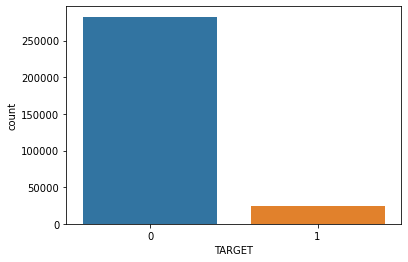

In [21]:
sns.countplot(df["TARGET"])

In [22]:
#dataset is highly imbalanced

In [23]:
df_num = df.select_dtypes(exclude= "object")
df_num.head()
df_num = df_num.drop("TARGET",axis=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_sc = sc.fit_transform(df_num)
df_num_sc = pd.DataFrame(df_sc,index=df_num.index,columns=df_num.columns)
df_num_sc.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.0,0.001512,0.090287,0.256321,0.888839,0.045086,0.852140,0.705433,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.002089,0.311736,0.045016,0.477114,0.043648,0.951929,0.959566,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000358,0.022472,0.134897,0.348534,0.046161,0.827335,0.648326,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000935,0.066837,0.107023,0.350846,0.038817,0.601451,0.661387,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000819,0.116854,0.392880,0.298591,0.038820,0.825268,0.519522,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_cat = df.select_dtypes(include= "object")

In [26]:
cols = df_cat.columns

In [27]:
#from sklearn.preprocessing import LabelEncoder
#lr = LabelEncoder()
#for col in cols:
 #   df_cat[col]= lr.fit_transform(df_cat[col])


In [28]:
df_cat.head()
df_cat = pd.get_dummies(df_cat)

In [29]:
df_cat.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Businessman,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 99 columns):
 #   Column                                             Non-Null Count   Dtype
---  ------                                             --------------   -----
 0   NAME_CONTRACT_TYPE_Cash loans                      307511 non-null  uint8
 1   NAME_CONTRACT_TYPE_Revolving loans                 307511 non-null  uint8
 2   CODE_GENDER_F                                      307511 non-null  uint8
 3   CODE_GENDER_M                                      307511 non-null  uint8
 4   CODE_GENDER_XNA                                    307511 non-null  uint8
 5   FLAG_OWN_CAR_N                                     307511 non-null  uint8
 6   FLAG_OWN_CAR_Y                                     307511 non-null  uint8
 7   FLAG_OWN_REALTY_N                                  307511 non-null  uint8
 8   FLAG_OWN_REALTY_Y                                  307511 non-null  uint8
 9   NAME_INCOME_TYP

In [31]:
df_final = pd.concat([df_num_sc,df_cat,df["TARGET"]],axis=1)

In [32]:
#spliting the dependent and in indepnedent variables
x = df_final.drop("TARGET",axis=1)
y= df_final["TARGET"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state=67)

In [35]:
x_train.shape

(215257, 142)

In [36]:
x_test.shape

(92254, 142)

In [37]:
y_train.shape

(215257,)

In [38]:
y_test.shape

(92254,)

In [39]:
#x_train = np.array(x_train)
#x_test = np.array(x_test)

In [40]:
y_train1 = keras.utils.to_categorical(y_train, 2)
y_test1 = keras.utils.to_categorical(y_test, 2)


In [41]:
## deep nn
model = Sequential()
model.add(Dense(512,activation = 'relu',input_dim=142))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid'))



model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               73216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [42]:
#compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adaDelta',
              metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train1,batch_size=2000,
                    epochs=10,
                    verbose=1,
                   validation_data=(x_test, y_test1))
score = model.evaluate(x_test, y_test1, verbose=0)

Train on 215257 samples, validate on 92254 samples
Epoch 1/10
215257/215257 [==============================] - 8s 35us/step - loss: 0.2885 - accuracy: 0.9192 - val_loss: 0.2705 - val_accuracy: 0.9195
Epoch 2/10
215257/215257 [==============================] - 8s 38us/step - loss: 0.2848 - accuracy: 0.9191 - val_loss: 0.2702 - val_accuracy: 0.9195
Epoch 3/10
215257/215257 [==============================] - 8s 38us/step - loss: 0.2817 - accuracy: 0.9192 - val_loss: 0.2707 - val_accuracy: 0.9195
Epoch 4/10
215257/215257 [==============================] - 8s 38us/step - loss: 0.2793 - accuracy: 0.9192 - val_loss: 0.2698 - val_accuracy: 0.9195
Epoch 5/10
215257/215257 [==============================] - 8s 38us/step - loss: 0.2776 - accuracy: 0.9192 - val_loss: 0.2699 - val_accuracy: 0.9195
Epoch 6/10
215257/215257 [==============================] - 8s 38us/step - loss: 0.2763 - accuracy: 0.9192 - val_loss: 0.2698 - val_accuracy: 0.9195
Epoch 7/10
215257/215257 [=============================

In [45]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2693857206576619
Test accuracy: 0.919537365436554


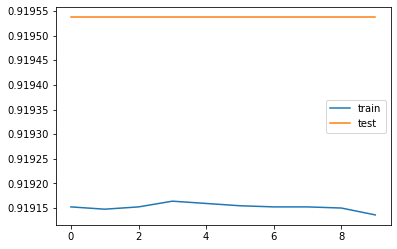

In [46]:
#plot accuracy epochs
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()



In [47]:
#accuracy of model is 91.95 for test data and train data has been imporivng by every epoch

In [48]:
lr_probs = model.predict(x_test)

In [54]:
from sklearn.metrics import RocCurveDisplay,plot_roc_curve,plot_precision_recall_curve,roc_auc_score,roc_curve

In [50]:
ns_probs = [0 for _ in range(len(y_test))]

In [51]:
lr_probs = lr_probs[:, 1]

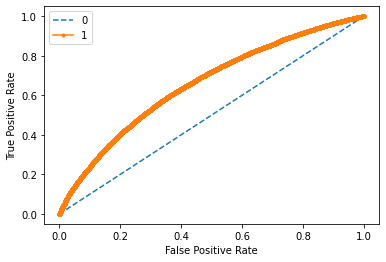

In [58]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='0')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='1')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [59]:
#auc
print('0: ROC AUC=%.3f' % (ns_auc))
print('1: ROC AUC=%.3f' % (lr_auc))

0: ROC AUC=0.500
1: ROC AUC=0.658
